# **Ejercicio 4 : QuTiP**
Resolver numéricamente usando QuTiP la ecuación de Lindblad para un sistema de dos niveles acoplado a un entorno bosónico a temperatura T:

$$
\dot{ \rho } = - i \left [ H ; \rho \right ] + (n_w + 1)\frac{\gamma }{2} (2 \sigma _- \rho \sigma _+ -\left\{\sigma _+ \sigma _- ; \rho \right\}) + n_w \frac{\gamma }{2} (2 \sigma _+ \rho \sigma _- -\left\{\sigma _- \sigma _+ ; \rho \right\}) $$

con el hamiltoniano libre del qubit :

 $$H = \frac{ω\sigma _z}{2} $$

Con el número de ocupación bosónico :

$$n_ω = \frac{1}{exp(\frac{ω}{K_B T}) − 1} $$

Tomando como estados iniciales:
 $$|0⟩$$ o $$\frac{(|0⟩ + |1⟩)}{√2}$$

y tomando:

$$γ = 0,2ω $$




In [ ]:
# @title Imports

! pip install qutip
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 39.2 MB/s eta 0:00:00


# Voy a usar el estado:  $$\frac{(|0⟩ + |1⟩)}{√2}$$

Lo defino con las funciones:

```
basis(N,0)
unit()
```





In [ ]:
# @title Defino el estado superposición 0 y 1 y lo normalizo :
N = 2

n_0 = basis(N,0)
n_1 = basis(N,1)
n = n_0 + n_1

n = n.unit()

print(n)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]


# Voy a resolver la ecuación de Lindblad.
Para conseguir esto, tengo que definir los operadores de colapso:

$$ C_n =  \sqrt{ \gamma _n } A_n $$

Con $A_n$ los operadores $\sigma _+$ y $\sigma _-$ y definiendo:  

$$ \left\{\begin{matrix}
\gamma _- =   \frac{\gamma .(n_\omega+1)}{2}
 \\
 \gamma _+ =   \frac{\gamma .n_\omega}{2}
\end{matrix}
\right. $$

Usando las funciones de Qutip:


```
sigmap()
sigmam()

```



In [ ]:
# @title Defino los parámetros del problema, n_omega y los operadores C- y C+ :

T=100
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_m= gamma*(n_w+1)/2

gamma_p=gamma*(n_w)/2

Cp=np.sqrt(gamma_p) * sigmap()
Cm=np.sqrt(gamma_m) * sigmam()


# a) b) Resolver la ecuación de Lindblad, graficar las poblaciones y los valores de expectación para las matrices sigma en función del tiempo:

Utilizo los métodos de Qutip:


```
mesolve()
sigmaz()
sigmay()
sigmax()
.purity()
.real
```


Aplicando en los argumentos de `mesolve()`, los operadores de colapso $C_n$ definidos en la celda anterior.

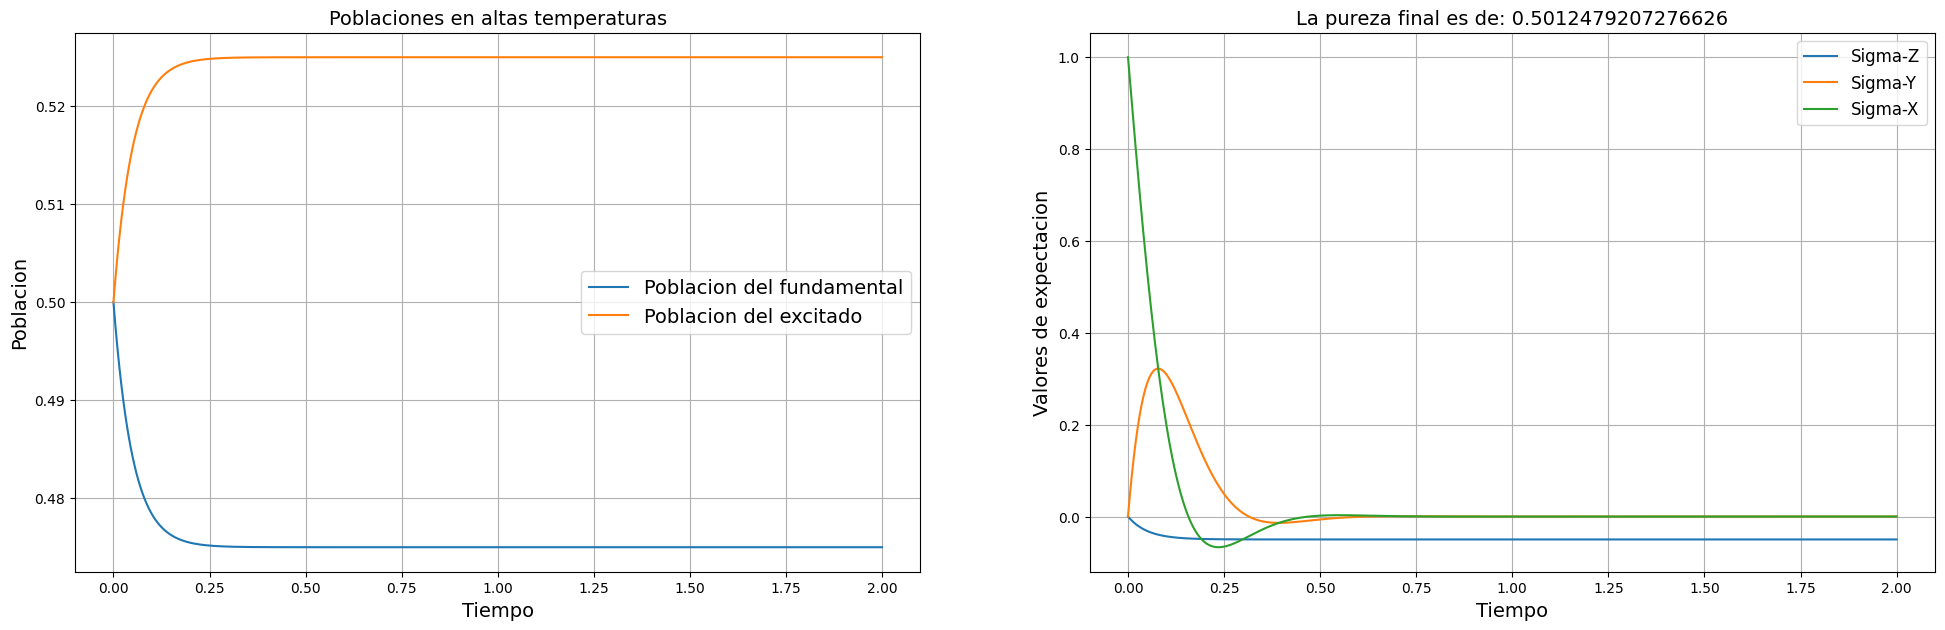

In [ ]:
# @title Respondemos a) y b) para temperaturas altas (T=100):

H= omega* sigmaz() /2
t = np.linspace(0.0, 2, 400)

result = mesolve(H, n, t, [Cm, Cp], [sigmaz(), sigmay(),sigmax()])

res = mesolve(H, n, t, [Cm, Cp], [])

rho_f = res.states[-1]
pureza = rho_f.purity()

pob0=[state[0, 0].real for state in res.states]
pob1=[state[1, 1].real for state in res.states]

fig, [ax1,ax] = plt.subplots(ncols=2, nrows=1, figsize=(24,7))

ax1.set_title(f"Poblaciones en altas temperaturas", fontsize=14)

ax1.plot(t, pob0,label="Poblacion del fundamental")
ax1.plot(t, pob1,label="Poblacion del excitado")
ax1.grid()
ax1.set_xlabel('Tiempo',fontsize=14)
ax1.set_ylabel('Poblacion',fontsize=14)
ax1.legend(fontsize=14)

ax.plot(t, result.expect[0])
ax.plot(t, result.expect[1])
ax.plot(t, result.expect[2])

ax.set_xlabel('Tiempo',fontsize=14)
ax.set_ylabel('Valores de expectacion',fontsize=14)
ax.legend(("Sigma-Z", "Sigma-Y", "Sigma-X"),fontsize=12)
ax.set_title(f"La pureza final es de: {pureza}", fontsize=14)
ax.grid()
plt.show()



#  A temperatura alta $<\sigma _x>$ y $<\sigma _y>$ tienden a 0:
Esto es comparable con el ejercicio de la entrega anterior, donde se observaba el mismo comportamiento. Se puede ver que $<\sigma _z>$ tiende a un valor no nulo menor a 1, ya que este guarda una relación directa con la pureza en tiempos largos.

# Las poblaciones con alta temperatura:
Con el estado inicial: $$\frac{(|0⟩ + |1⟩)}{√2}$$
Inicialmente las poblaciones son iguales, pero estas se bifurcan y llegan a un nuevo equilibrio donde el estado excitado predomina.


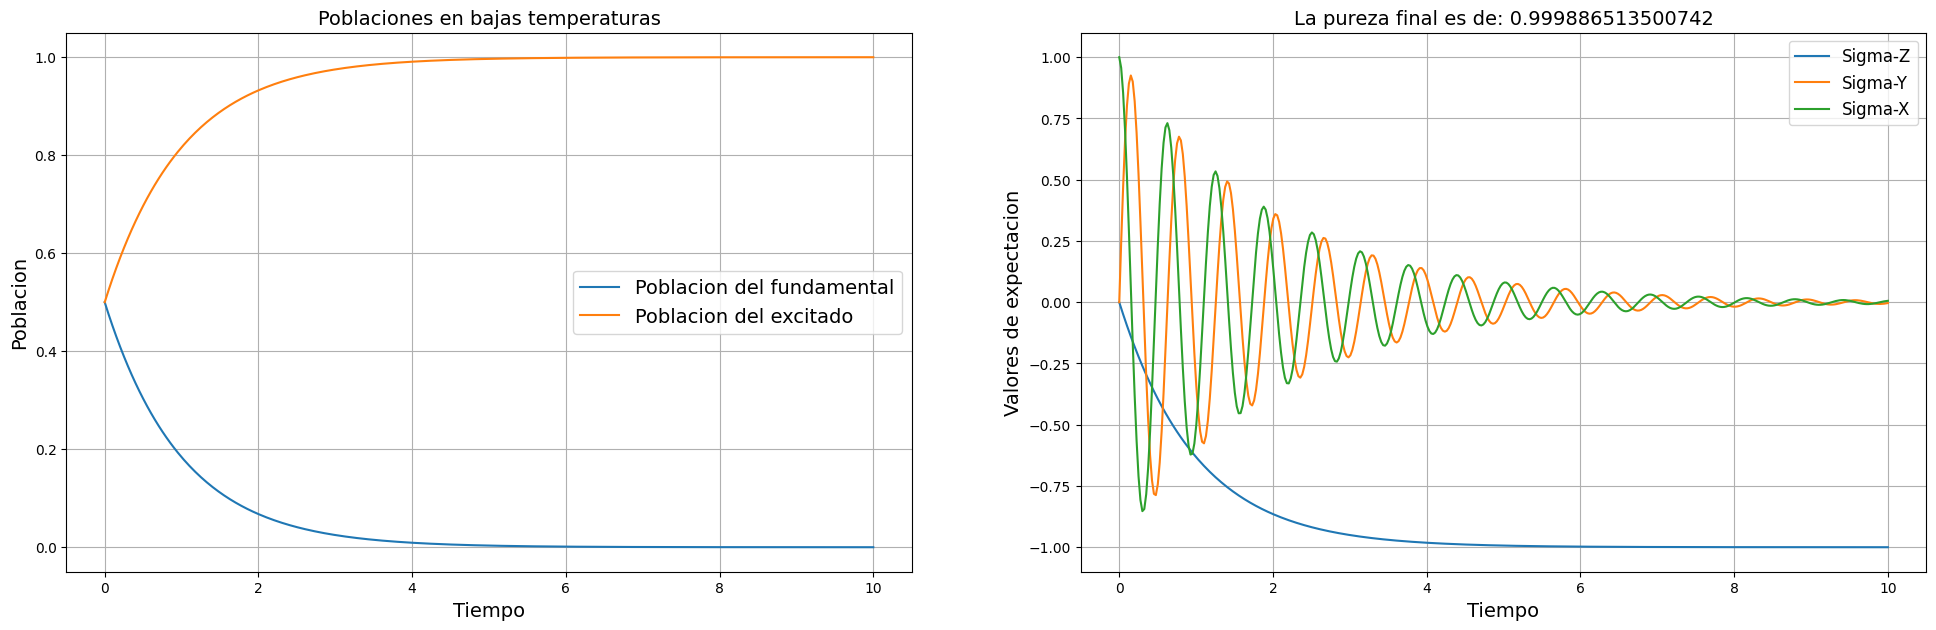

In [ ]:
# @title Con bajas temperaturas (T=1):

T=1
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_m= gamma*(n_w+1)/2

gamma_p=gamma*(n_w)/2

Cp=np.sqrt(gamma_p) * sigmap()
Cm=np.sqrt(gamma_m) * sigmam()

H= omega* sigmaz() /2
t = np.linspace(0.0, 10, 400)

result = mesolve(H, n, t, [Cm, Cp], [sigmaz(), sigmay(),sigmax()])

res = mesolve(H, n, t, [Cm, Cp], [])

rho_f = res.states[-1]
pureza = rho_f.purity()

pob0=[state[0, 0].real for state in res.states]
pob1=[state[1, 1].real for state in res.states]

fig, [ax1,ax] = plt.subplots(ncols=2, nrows=1, figsize=(24,7))

ax1.set_title("Poblaciones en bajas temperaturas", fontsize=14)

ax1.plot(t, pob0,label="Poblacion del fundamental")
ax1.plot(t, pob1,label="Poblacion del excitado")
ax1.grid()
ax1.set_xlabel('Tiempo',fontsize=14)
ax1.set_ylabel('Poblacion',fontsize=14)
ax1.legend(fontsize=14)

ax.plot(t, result.expect[0])
ax.plot(t, result.expect[1])
ax.plot(t, result.expect[2])

ax.set_xlabel('Tiempo',fontsize=14)
ax.set_ylabel('Valores de expectacion',fontsize=14)
ax.legend(("Sigma-Z", "Sigma-Y", "Sigma-X"),fontsize=12)
ax.set_title(f"La pureza final es de: {pureza}", fontsize=14)
ax.grid()
plt.show()

# En el caso de bajas temperaturas:
Se tiene un comportamiento oscilatorio para $<\sigma _x>$ y $<\sigma _y>$, pero la pureza del sistema se mantiene y $<\sigma _z>$ tiende a -1 al igual que tomando el límite de t tendiendo a infinito y temperatura 0 para la solución exacta del ejercicio 5 de la entrega 2. En este caso, se ve que la pureza es casi completa a tiempo final.

# Las poblaciones en bajas temperaturas:
Con el estado inicial: $$\frac{(|0⟩ + |1⟩)}{√2}$$

Se observa un comportamiento análogo al caso de altas temperaturas, pero extremizado en el sentido de que la población del fundamental tiende a 0 y la población del excitado a 1.

# C) D) Vector de Bloch y Pureza del sistema:
Voy a responder estos dos items juntos, ya que conceptualmente se complementan bien los gráficos de la trayectoria y las purezas. Sabemos que el vector de Bloch se puede escribir como:

$$ \left\{\begin{matrix}
u = 2 Re(\rho _{01})
\\
v = 2 Im(\rho _{10})
\\
w=\rho _{00} - \rho _{11}
\end{matrix}
\right. $$

Siendo el vector de Bloch:
$$\overrightarrow{a} = (u,v,w)
$$
Y la pureza también la conocemos usando la matriz densidad:
$$P=Tr(\rho^2)$$

In [ ]:
# @title Utilizo la matriz densidad para definir un arreglo con vectores de Bloch :

rho_f = res.states

u=[2*state[0, 1].real for state in res.states]
v=[2*state[1, 0].imag for state in res.states]

w=[(state[0, 0].real-state[1, 1].real) for state in res.states]




In [ ]:
# @title Defino mi arreglo de matrices densidad al cuadrado trazadas :

rho_sq = [state * state for state in rho_f]

tr_rho_sq = [matrix.tr() for matrix in rho_sq]

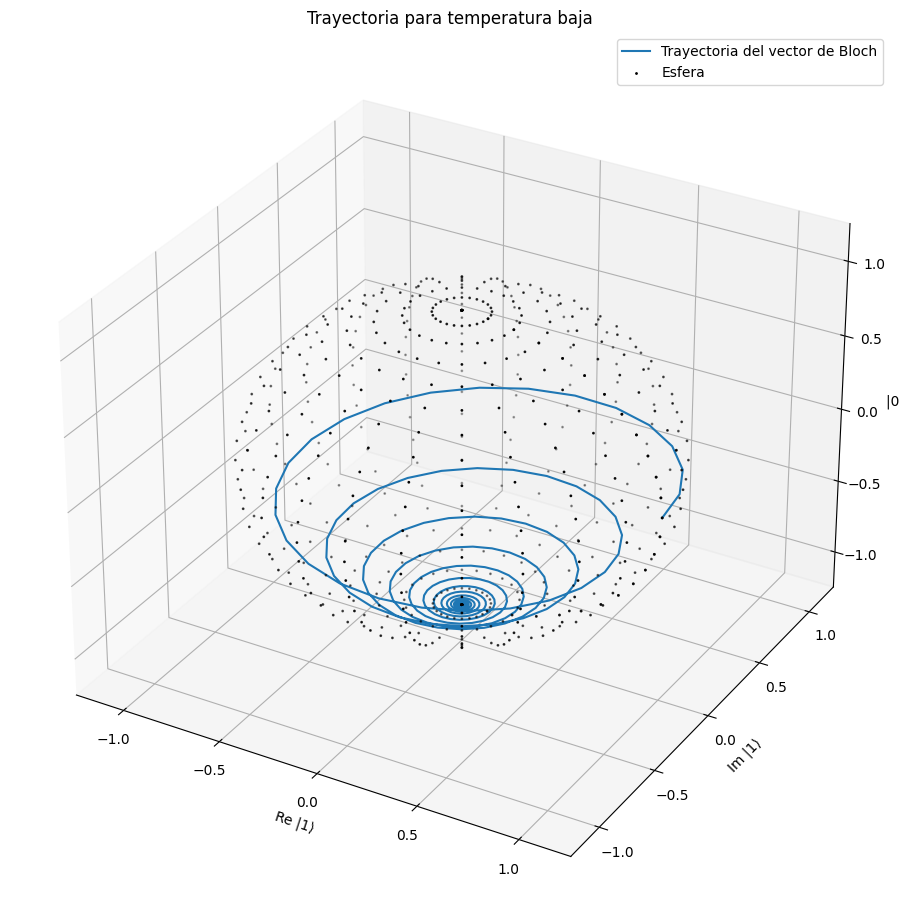

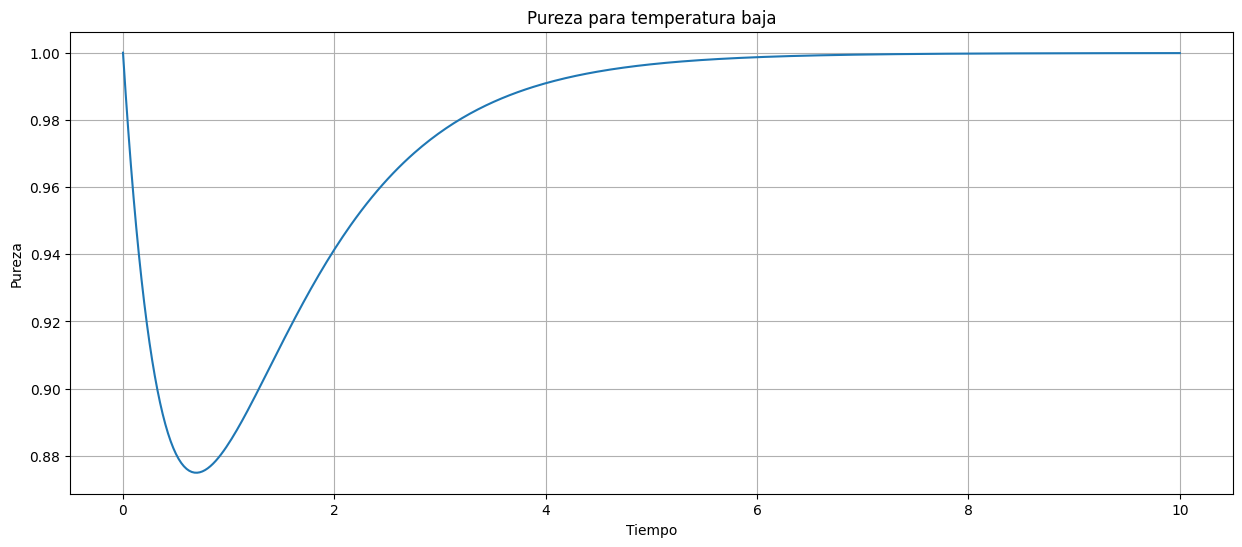

In [ ]:
# @title Uso el vector de Bloch y hago un scatter sobre la superficie de la esfera pura

from mpl_toolkits.mplot3d import Axes3D

num_points = 25
theta = np.linspace(0, np.pi, num_points)
phi = np.linspace(0, 2 * np.pi, num_points)
theta, phi = np.meshgrid(theta, phi)

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

x = x.flatten()
y = y.flatten()
z = z.flatten()

fig = plt.figure(figsize=(10, 11))

fig.subplots_adjust(left=-1.8, right=1, top=0.9, bottom=0.1)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-1.2, 1.2); ax.set_ylim(-1.2, 1.2); ax.set_zlim(-1.2, 1.2);

ax.plot(u, v, w, label='Trayectoria del vector de Bloch')
ax.scatter(x, y, z, s=1, c="k", label="Esfera")

ax.set_title('Trayectoria para temperatura baja')
ax.set_xlabel('Re |1⟩')
ax.set_ylabel('Im |1⟩')
ax.set_zlabel('|0⟩ ')
ax.legend()

fig1, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(t,tr_rho_sq)
ax1.set_title('Pureza para temperatura baja')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Pureza')
ax1.grid()
ax.legend()

plt.show()

# Obtenemos los mismos resultados que para la entrega anterior:
Inicialmente, se tiene un estado puro y este evoluciona perdiendo una parte de su pureza debido a la disipación, pero eventualmente como $\overrightarrow{a} = (u,v,w)$ tiende al estado $w=-1$, esta vuelve a tender a 1. Esto puede verse en la trayectoria del vector de Bloch, la cual comienza en una superposición de los dos niveles, que es autoestado de $<\sigma _x>$ y va en espiral por el centro de la esfera hacia el estado con vector de Bloch apuntando hacia abajo.


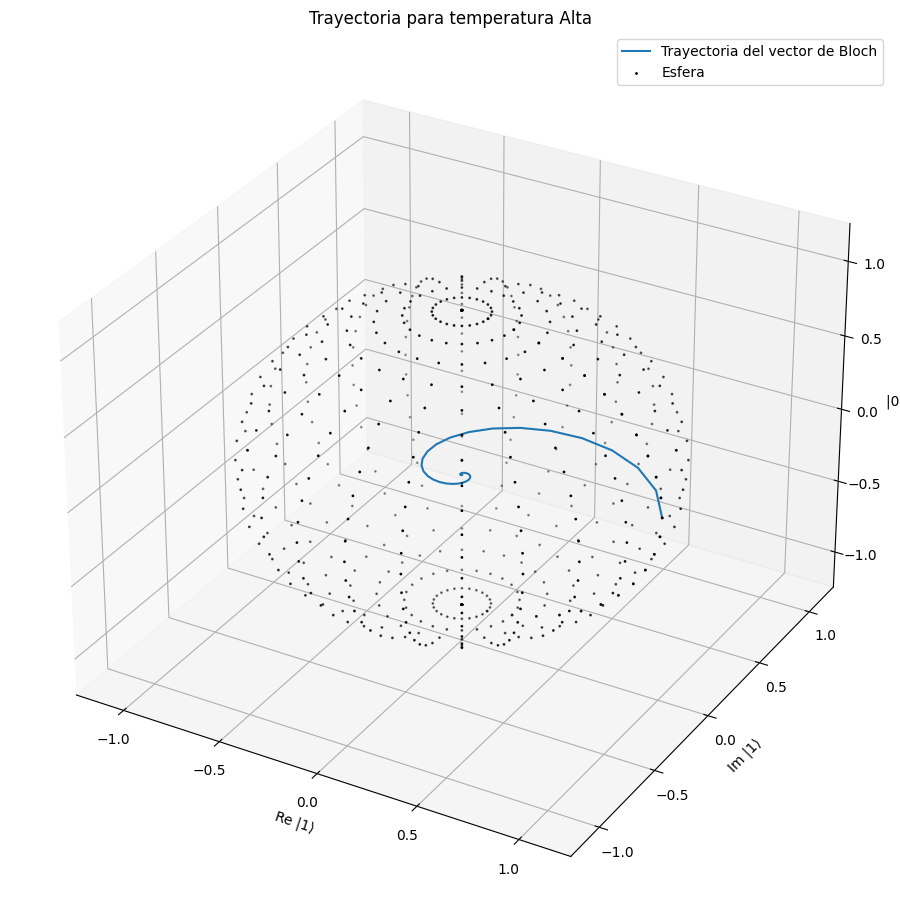

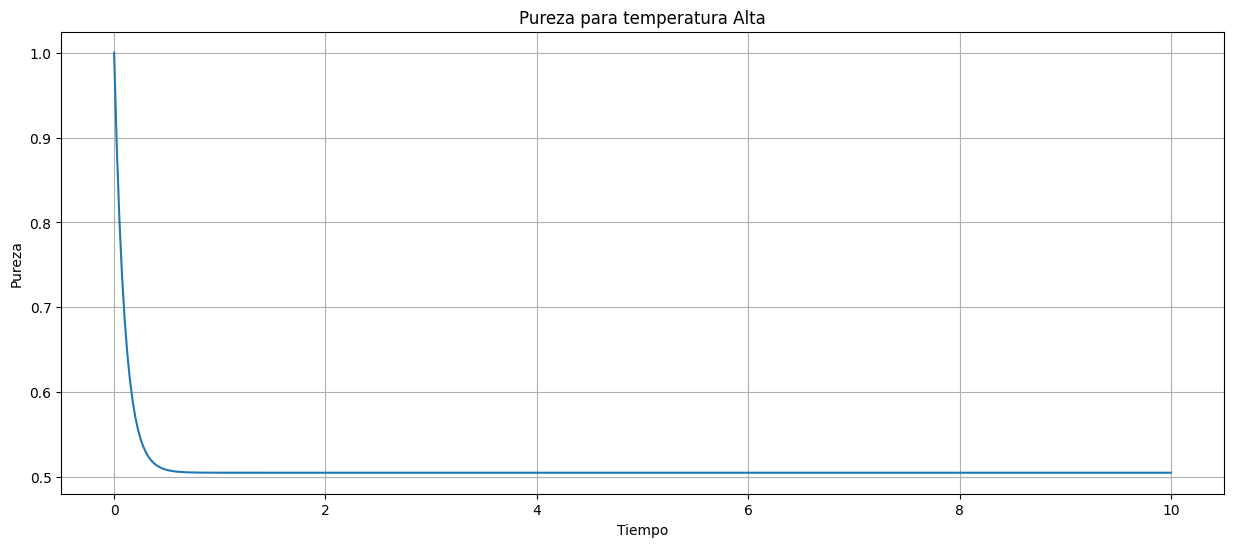

In [ ]:
# @title Hago lo mismo para un estado con una temperatura mayor:

T=50
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_m= gamma*(n_w+1)/2

gamma_p=gamma*(n_w)/2

Cp=np.sqrt(gamma_p) * sigmap()
Cm=np.sqrt(gamma_m) * sigmam()

H= omega* sigmaz() /2
t = np.linspace(0.0, 10, 400)

result = mesolve(H, n, t, [Cm, Cp], [sigmaz(), sigmay(),sigmax()])

res = mesolve(H, n, t, [Cm, Cp], [])

rho_f = res.states

u=[2*state[0, 1].real for state in res.states]
v=[2*state[1, 0].imag for state in res.states]

w=[(state[0, 0].real-state[1, 1].real) for state in res.states]

rho_sq = [state * state for state in rho_f]

tr_rho_sq = [matrix.tr() for matrix in rho_sq]

num_points = 25
theta = np.linspace(0, np.pi, num_points)
phi = np.linspace(0, 2 * np.pi, num_points)
theta, phi = np.meshgrid(theta, phi)

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

x = x.flatten()
y = y.flatten()
z = z.flatten()

# @title Uso el vector de Bloch y hago un scatter sobre la superficie de la esfera pura

from mpl_toolkits.mplot3d import Axes3D

num_points = 25
theta = np.linspace(0, np.pi, num_points)
phi = np.linspace(0, 2 * np.pi, num_points)
theta, phi = np.meshgrid(theta, phi)

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

x = x.flatten()
y = y.flatten()
z = z.flatten()

fig = plt.figure(figsize=(10, 11))

fig.subplots_adjust(left=-1.8, right=1, top=0.9, bottom=0.1)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-1.2, 1.2); ax.set_ylim(-1.2, 1.2); ax.set_zlim(-1.2, 1.2);

ax.plot(u, v, w, label='Trayectoria del vector de Bloch')
ax.scatter(x, y, z, s=1, c="k", label="Esfera")

ax.set_title('Trayectoria para temperatura Alta')
ax.set_xlabel('Re |1⟩')
ax.set_ylabel('Im |1⟩')
ax.set_zlabel('|0⟩ ')
ax.legend()

fig1, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(t,tr_rho_sq)
ax1.set_title('Pureza para temperatura Alta')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Pureza')
ax1.grid()
ax.legend()

plt.show()

# Diferencias en trayectoria del vector de bloch para altas y bajas temperaturas:
Como se adelantaba con las soluciones para los valores medios de las matrices $\sigma$ , para el caso de altas temperaturas la pureza decrece a su valor mínimo($\frac{1}{2}$), mientras que para el caso de bajas temperaturas teníamos que esta recuperaba su valor máximo (1). Esta tendencia a de la pureza se explica ya que la dimensión del espacio de Hilbert del sistema es 2 y la pureza está acotada inferiormente por: $\frac{1}{Dim(H)}$

En el gráfico de la trayectoria del vector de Bloch puede verse que el estado colapsa al centro de la esfera, lo cual nos lleva a un estado maximamente mixto.

# E) Finalmente, graficamos la entropía de Von Neumann.
La definición:

$$S_{VN} = - Tr(\rho log(\rho))$$

Podemos diagonalizar $\rho$ y sumar cada componente para obtener la entropía de Von Neumann como:

$$S_{VN} = - \sum n_jlog(n_j)$$

Donde $n_j$ son las componentes de la matriz diagonalizada

# Comenzamos con el caso de altas temperaturas:

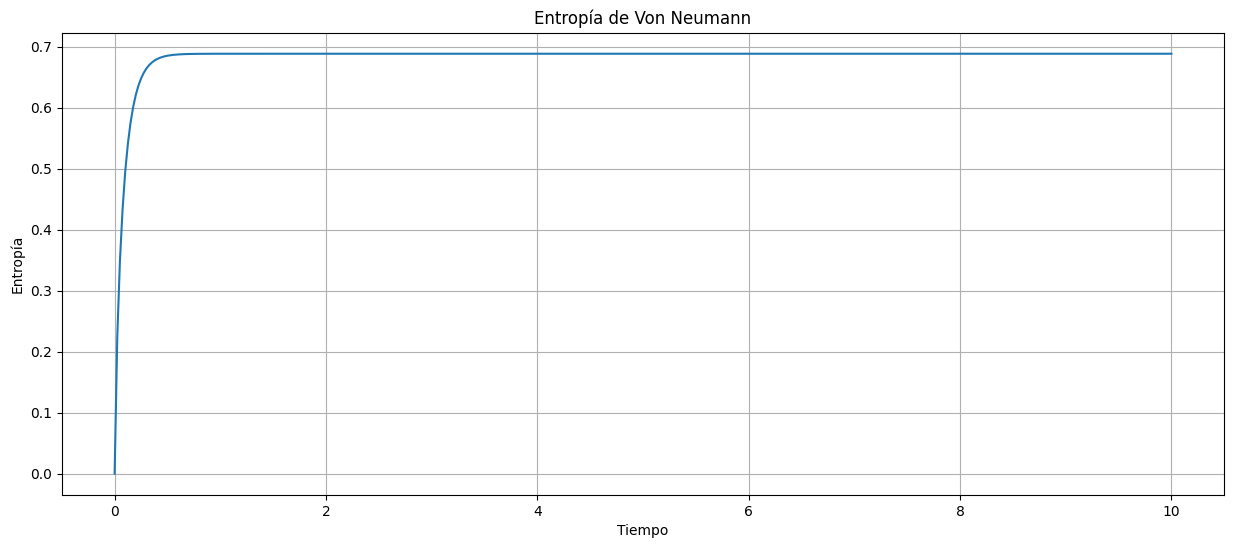

In [ ]:
# @title Calculamos el arreglo para la entropía

eigenvalues = [state.eigenenergies() for state in res.states]

S = [-(eigen[0]*np.log(eigen[0].clip(1e-15)) + eigen[1]*np.log(eigen[1].clip(1e-15)) ) for eigen in eigenvalues]

fig1, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(t,S)
ax1.set_title('Entropía de Von Neumann')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Entropía')
ax1.grid()
ax.legend()

plt.show()



# Para el caso de baja temperatura:

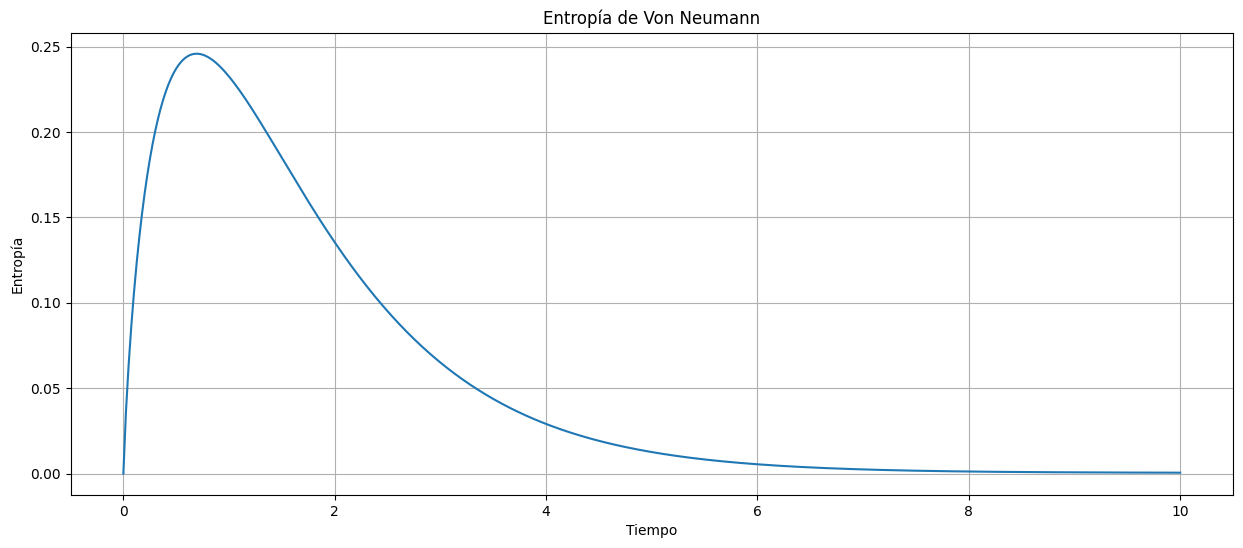

In [ ]:
# @title Cálculo para el caso de temperatura baja (T=1)

T=1
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_m= gamma*(n_w+1)/2

gamma_p=gamma*(n_w)/2

Cp=np.sqrt(gamma_p) * sigmap()
Cm=np.sqrt(gamma_m) * sigmam()

H= omega* sigmaz() /2
t = np.linspace(0.0, 10, 400)

result = mesolve(H, n, t, [Cm, Cp], [sigmaz(), sigmay(),sigmax()])

res = mesolve(H, n, t, [Cm, Cp], [])

eigenvalues = [state.eigenenergies() for state in res.states]

S = [-(eigen[0]*np.log(eigen[0].clip(1e-15)) + eigen[1]*np.log(eigen[1].clip(1e-15)) ) for eigen in eigenvalues]

fig1, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(t,S)
ax1.set_title('Entropía de Von Neumann')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Entropía')
ax1.grid()
ax.legend()

plt.show()



# Ambos resultados son coherentes con la pureza calculada:
En el caso de alta temperatura, comenzamos con un estado puro, el cual tiene asociado una entropía nula ya que para un estado puro se tiene que la matriz densidad es idempotente $\rho = \rho²$:
$$S=-Tr(\rho² log(\rho²))$$
y entonces $S=0$ . Finalmente la solución con alta temperatura decohere a un estado maximalmente mixto, como se ve en el gráfico de la pureza, donde esta tiende a $1/2$.

En el caso de baja temperatura $T$, también se comienza con un estado puro $P=1$, y este decohere momentaneamente hasta volver a tender a un estado puro, el cual tiene una entropía $S=0$.

# **Ejercicio 6 : QuTiP**
Resolver numéricamente usando QuTiP la ecuación de Lindblad para un oscilador armónico acoplado a un entorno bosónico a temperatura T:

$$
\dot{ \rho } = - i \left [ H ; \rho \right ] + (n_w + 1)\frac{\gamma }{2} (2  a \rho a^\dagger + -\left\{a^\dagger a ; \rho \right\}) + n_w \frac{\gamma }{2} (2 a^\dagger \rho a -\left\{a a^\dagger ; \rho \right\}) $$

con el Hamiltoniano del oscilador:

 $$H = ωa^\dagger a$$

Con el número de ocupación bosónico :

$$n_ω = \frac{1}{exp(\frac{ω}{K_B T}) − 1} $$

Tomando como estados iniciales:
 $$|\alpha⟩$$ o $$\frac{(|\alpha⟩ + |-\alpha⟩)}{√C}$$

y tomando:

$$γ = 0,2ω $$



# Voy a usar el estado: $$|\alpha⟩$$


# Voy a resolver la ecuación de Lindblad.
Para conseguir esto, tengo que definir los operadores de colapso:

$$ C_n =  \sqrt{ \gamma _n } A_n $$

Con $A_n$ los operadores $a$ y $a^\dagger$ y definiendo:  

$$ \left\{\begin{matrix}
\gamma _{creation} =   \frac{\gamma .(n_\omega+1)}{2}
 \\
 \gamma _{destruction} =   \frac{\gamma .n_\omega}{2}
\end{matrix}
\right. $$

In [ ]:
# @title Defino los parámetros, operadores y el estado:

N=10
T=100
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_creation= gamma*(n_w+1)/2

gamma_destruction=gamma*(n_w)/2

a= destroy(N)
a_dag= a.dag()

C_a = np.sqrt(gamma_destruction) * a
C_a_dag = np.sqrt(gamma_creation) * a_dag

N_op = num(N)

ketalpha = coherent(N, 1)


In [ ]:
# @title Defino el Hamiltoniano:
H=omega*a*a_dag

# 6) A)Calcular para valores bajos medios y altos de temperatura:
$$ \left\{\begin{matrix}
< X >
 \\
< P >
\\
<\delta _X ²>
\\
<\delta _P ²>
\\
< N >
\end{matrix}
\right. $$

# Antes de seguir con la simulación:
Me piden calcular $<\delta _X ²>$ y $<\delta _P ²>$ . Como no tengo estas
funciones disponibles en qutip voy a tener que usar:

$$<\delta _X ²> = <X ²> - < X >²$$
$$<X²> = \frac{1}{2 \omega} <(a^\dagger) ^2 + a a^\dagger + a^\dagger a + a^2> $$
Donde se tomó $m=1$ y se hace un procedimiento análogo para la dispersión cuadrática media del momento ($<\delta _P ²>$):

$$<\delta _P²> = \frac{\omega}{2 } <(a^\dagger) ^2 - a a^\dagger - a^\dagger a + a^2>$$
Donde se tomó $ℏ=1$ y $m=1$ .


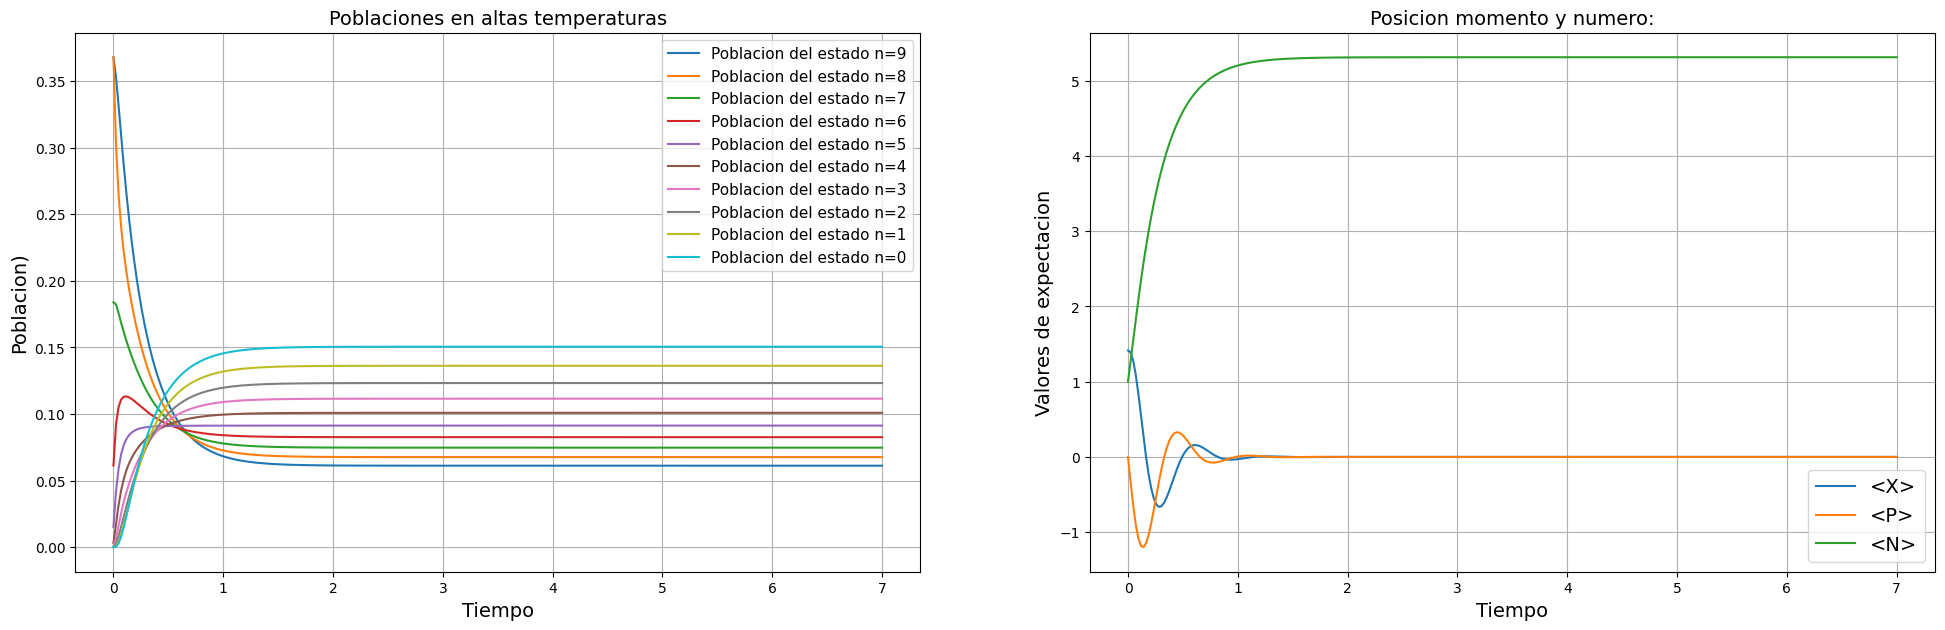

In [ ]:
# @title Simulo el sistema para altas temperaturas(T=100)
t = np.linspace(0, 7, 300)

result = mesolve(H, ketalpha, t, [C_a, C_a_dag], [position(N), momentum(N),num(N),a**2,a_dag**2,a*a_dag,a_dag*a])

res = mesolve(H, ketalpha, t, [C_a, C_a_dag], [])

rho_f = res.states[-1]
pureza = rho_f.purity()

fig, [ax1,ax] = plt.subplots(ncols=2, nrows=1, figsize=(24,7))

ax1.set_title(f"Poblaciones en altas temperaturas", fontsize=14)

for k in range(N):
  if k % 1 == 0:  # Skip even numbers
    pob=[state[k, k].real for state in res.states]
    ax1.plot(t, pob,label=f"Poblacion del estado n={N-k-1}")
    continue

ax1.grid()
ax1.set_xlabel('Tiempo',fontsize=14)
ax1.set_ylabel('Poblacion)',fontsize=14)
ax1.legend(fontsize=11)

ax.set_xlabel('Tiempo',fontsize=14)
ax.set_ylabel('Valores de expectacion',fontsize=14)
ax.legend(("Posicion", "Momento", "Numero"),fontsize=12)
ax.set_title(f"Posicion momento y numero:", fontsize=14)

deltax=(result.expect[3]+result.expect[4]+result.expect[5]+result.expect[6])/(2*omega) - result.expect[0]**2

deltap=-(result.expect[3]+result.expect[4]-result.expect[5]-result.expect[6])*(omega/2) - result.expect[1]**2

deltax=deltax.real
deltap=deltap.real

ax.plot(t, result.expect[0],label="<X>")
ax.plot(t, result.expect[1],label="<P>")
ax.plot(t, result.expect[2],label="<N>")

ax.legend(fontsize=14)
ax.grid()


# Graficamos :

$$<\delta _X ²> y <\delta _P ²>$$

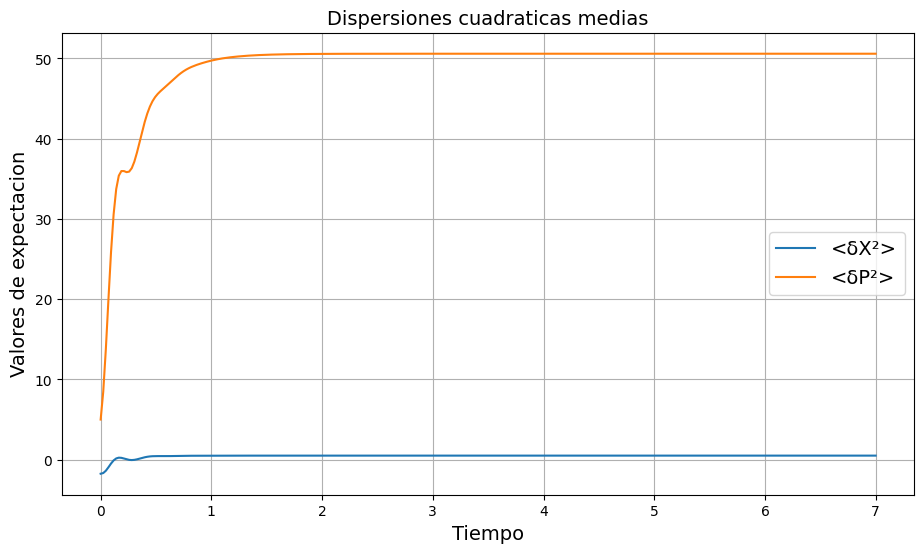

In [ ]:
# @title Grafico :

fig, ax1 = plt.subplots(figsize=(11,6))

ax1.set_title("Dispersiones cuadraticas medias", fontsize=14)
ax1.plot(t, deltax,label="<δX²>")
ax1.plot(t, deltap,label="<δP²>")
ax1.grid()
ax1.set_xlabel('Tiempo',fontsize=14)
ax1.set_ylabel('Valores de expectacion',fontsize=14)
ax1.legend(fontsize=14);

# Poblaciones en estados excitados térmicamente:
Los valores medios de las poblaciones parecen tender a un valor constante, ya que el sistema tiene energía entregada por el entorno térmico. Al aumentar la temperatura $T$, el sistema tiende a equi-partir la energía en un número $N$ limitado de estados y las diferencias entre poblaciones se vuelven menos visibles.

Como es de esperar, los valores medios $<X>$ y $<P>$ guardan una relación con el seno y el coseno, pero para tiempos largos tienden a 0 y el operador número crece a un valor constante. Esto puede verse en los cálculos del ejercicio 2, ya que :

$$ \left\{\begin{matrix}
<X(t)> = Ce^{-\gamma t}  (\Omega sin(\Omega t) - \gamma cos(\Omega t))
\\
\\
<P(t)> =  P_a e^{-2 \gamma t} + P_d e^{2 (\Omega - \gamma) t} + P_ee^{-2 (\Omega+ \gamma) t}
\\
\\
<N(t)>\approx <E(t)> ----> k_B T
\end{matrix}
\right. $$

Donde $C$, $P_a$ $P_d$ y $P_e$ son constantes, $\Omega$ puede ser imaginaria y se tomó el límite de $\gamma t >> 1$ para la energía.
Similarmente, se tiene que $<\delta _X ²>$ y $<\delta _P ²>$ pasan por un transitorio que oscila amortiguadamente, ambos tendiendo a tiempos largos a valores de: $\frac{K_B T}{m \omega²}$ y $mK_B T$ respectivamente.

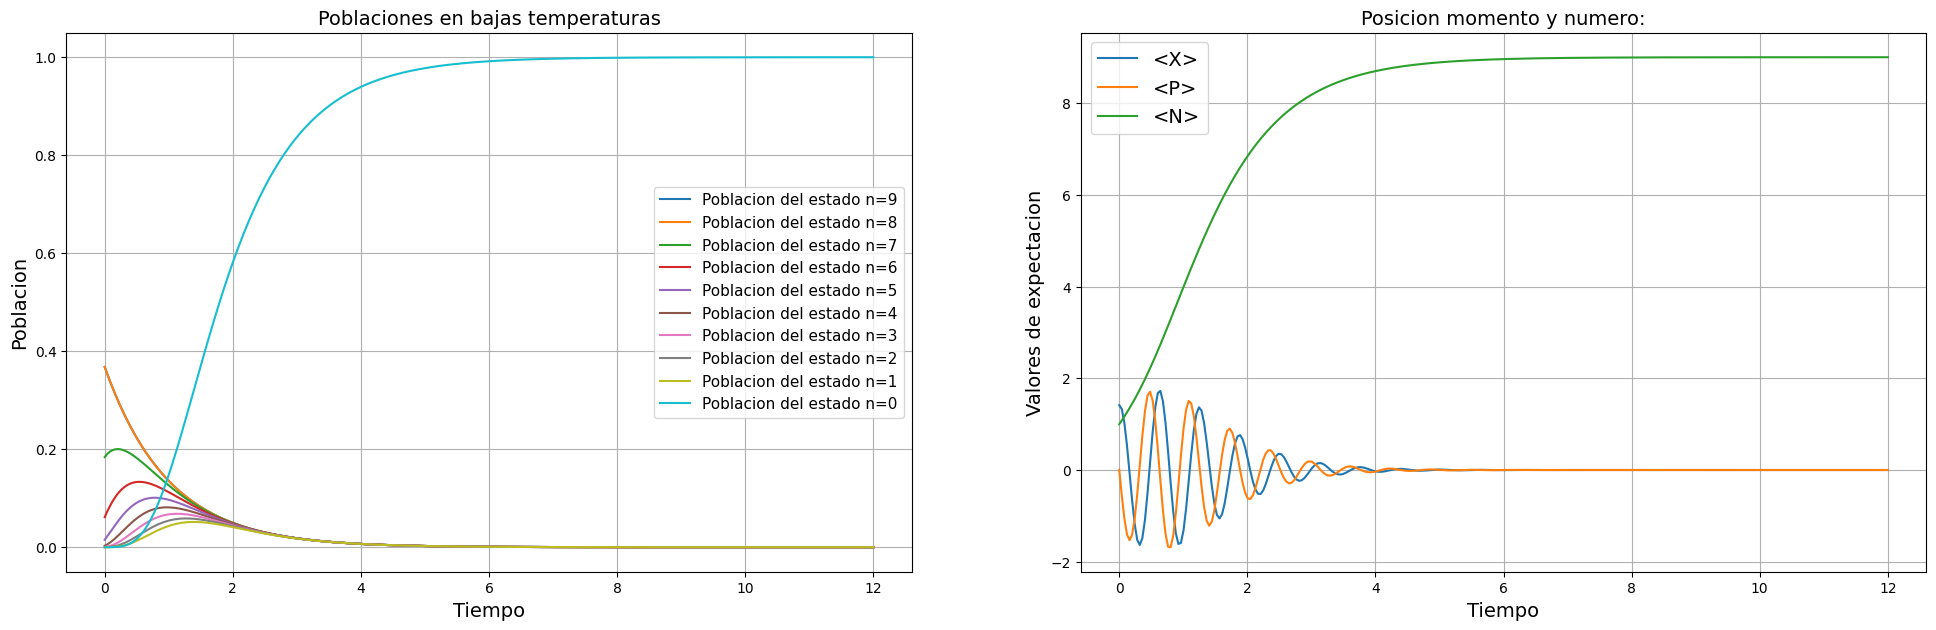

In [ ]:
# @title Hago lo mismo para temperatura baja (T=0.1)

N=10
T=0.1
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_creation= gamma*(n_w+1)/2

gamma_destruction=gamma*(n_w)/2

a= destroy(N)
a_dag= a.dag()

C_a = np.sqrt(gamma_destruction) * a
C_a_dag = np.sqrt(gamma_creation) * a_dag

N_op = num(N)

ketalpha = coherent(N, 1)
H=omega*a*a_dag
t = np.linspace(0, 12, 300)

result = mesolve(H, ketalpha, t, [C_a, C_a_dag], [position(N), momentum(N),num(N),a**2,a_dag**2,a*a_dag,a_dag*a])

res = mesolve(H, ketalpha, t, [C_a, C_a_dag], [])

for k in range(N):
  if k % 1 == 0:  # Skip even numbers
    pob=[state[k, k].real for state in res.states]
    ax1.plot(t, pob,label=f"Poblacion del estado n={N-k-1}")
    continue

deltax=(result.expect[3]+result.expect[4]+result.expect[5]+result.expect[6])/(2*omega) - result.expect[0]**2

deltap=-(result.expect[3]+result.expect[4]-result.expect[5]-result.expect[6])*(omega/2) - result.expect[1]**2

deltax=deltax.real
deltap=deltap.real

fig, [ax1,ax] = plt.subplots(ncols=2, nrows=1, figsize=(24,7))

ax1.set_title(f"Poblaciones en bajas temperaturas", fontsize=14)

for k in range(N):
  pob=[state[k, k].real for state in res.states]
  ax1.plot(t, pob,label=f"Poblacion del estado n={N-1-k}")

ax1.grid()
ax1.set_xlabel('Tiempo',fontsize=14)
ax1.set_ylabel('Poblacion',fontsize=14)
ax1.legend(fontsize=11)

ax.set_xlabel('Tiempo',fontsize=14)
ax.set_ylabel('Valores de expectacion',fontsize=14)
ax.legend(("Posicion", "Momento", "Numero"),fontsize=12)
ax.set_title(f"Posicion momento y numero:", fontsize=14)

ax.plot(t, result.expect[0],label="<X>")
ax.plot(t, result.expect[1],label="<P>")
ax.plot(t, result.expect[2],label="<N>")
ax.legend(fontsize=14)
ax.grid()

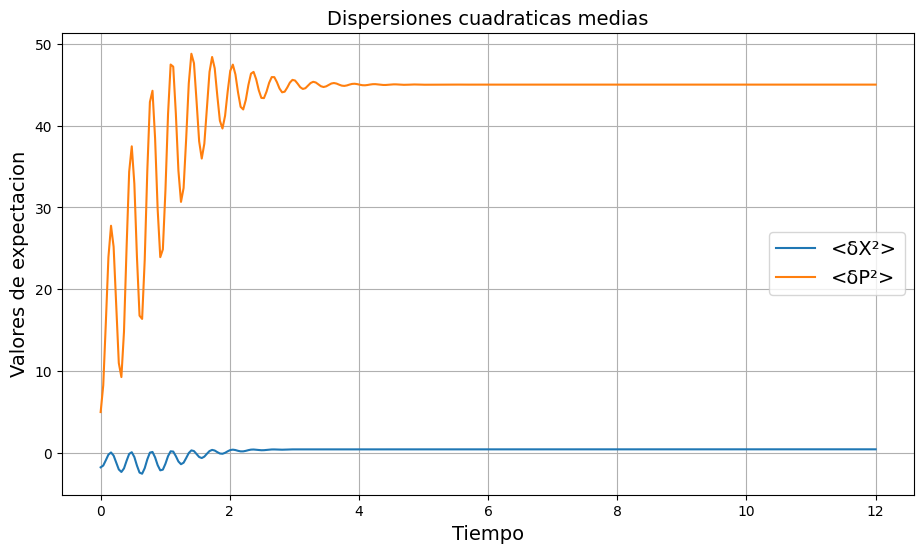

In [ ]:
# @title Evolución temporal de la dispersión
fig, ax1 = plt.subplots(figsize=(11,6))


ax1.set_title("Dispersiones cuadraticas medias", fontsize=14)
ax1.plot(t, deltax,label="<δX²>")
ax1.plot(t, deltap,label="<δP²>")
ax1.grid()
ax1.set_xlabel('Tiempo',fontsize=14)
ax1.set_ylabel('Valores de expectacion',fontsize=14)
ax1.legend(fontsize=14);

# El caso de bajas temperaturas $T$:
Se observa un comportamiento parecido para $<X>$ y $<P>$, lo cual es esperable. Pero las poblaciones al tener muy poca energía disponible, terminan tendiendo a 0 y el estado fundamental se vuelve máximamente poblado. En el caso de las dispersiones $<\delta _X ²>$ y $<\delta _P ²>$, puede verse que las oscilaciones son mayores inicialmente, pero al final, el estado estacionario tiende a ser una constante de un menor valor, ya que estas se calcularon en el ejercicio 2 como:
$\frac{K_B T}{m \omega²}$ y $mK_B T$ respectivamente

# 6) B) Calcular la función de Wigner $W$ para diferentes tiempos:
La función de Wigner $W$ se define:

$$W(x,p)= \frac{1}{ℏ \pi} \int_{- \infty }^{\infty } <x-y|\rho|x+y> e^{ \frac{i 2 Py}{ℏ \pi}} dy$$

Podemos utilizar la función:

```
wigner()
```
Del paquete de Qutip, en conjunto con la matriz densidad y dos vectores definidos como un arreglo con numpy.


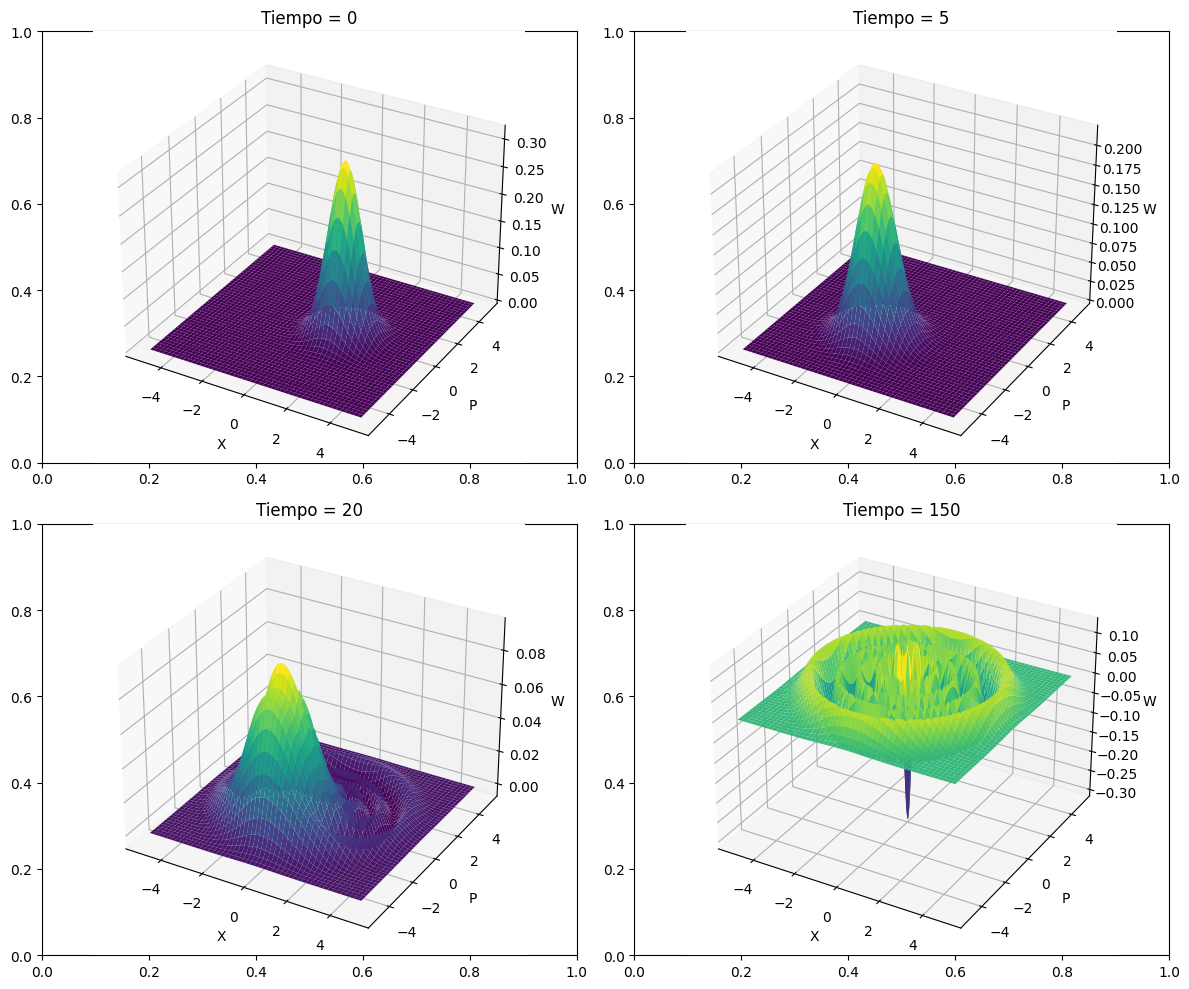

In [ ]:
# @title Función de Wigner en el caso de baja T:

rho_wig = [state for state in res.states]

X = np.linspace(-5,5,200)
P = np.linspace(-5,5,200)

times = [0, 5, 20, 150]
W_coherent = [wigner(rho_wig[time], X, P) for time in times]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axs.flat):
    W = W_coherent[i]
    X_, Y_ = np.meshgrid(X, P)
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.plot_surface(X_, Y_, W, cmap='viridis')
    ax.set_title(f'Tiempo = {times[i]}')
    ax.set_xlabel('X')
    ax.set_ylabel('P')
    ax.set_zlabel('W')

plt.tight_layout()
plt.show()


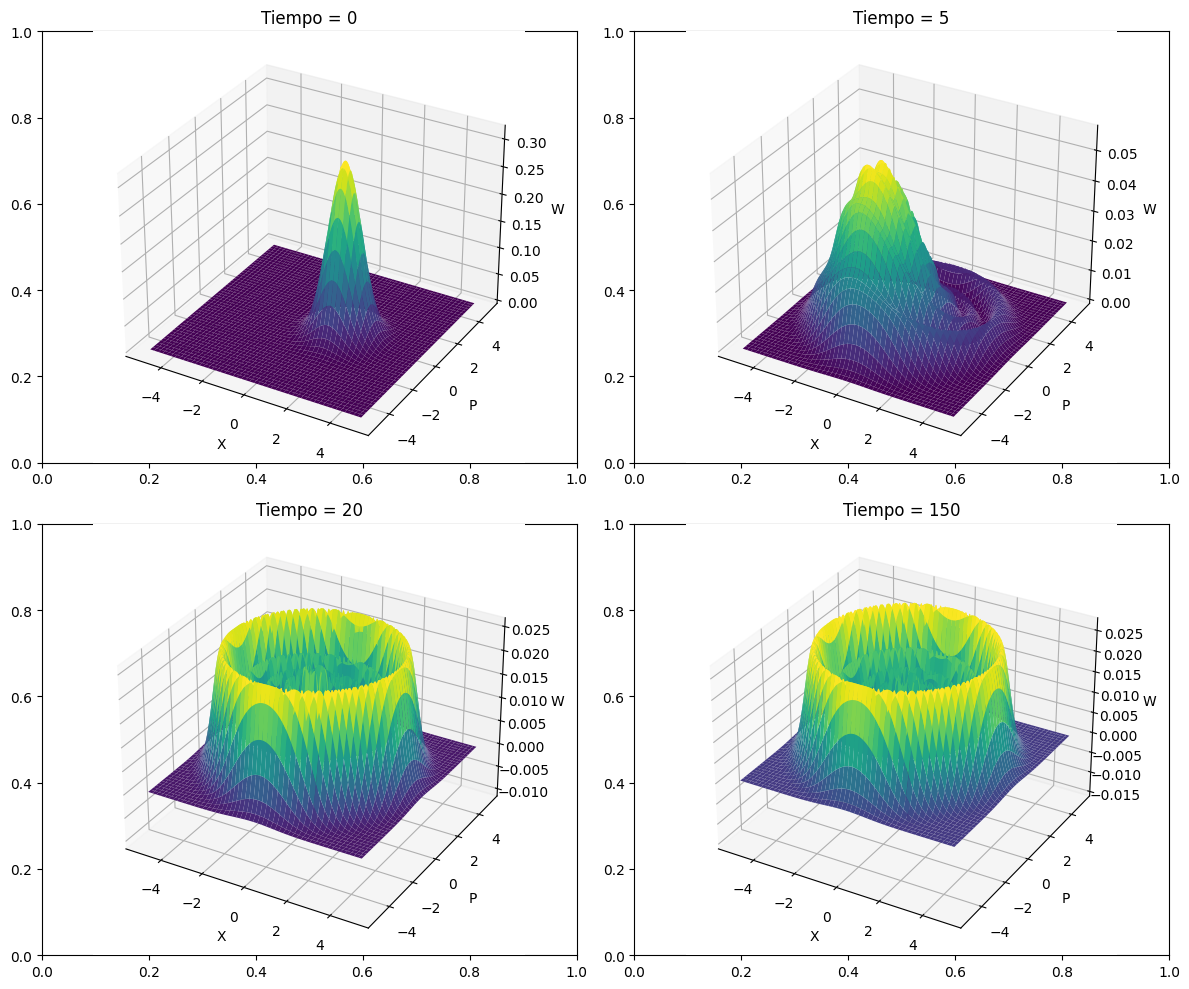

In [ ]:
# @title Función de Wigner para alta temperatura(T=100):
N=10
T=100
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_creation= gamma*(n_w+1)/2

gamma_destruction=gamma*(n_w)/2

a= destroy(N)
a_dag= a.dag()

C_a = np.sqrt(gamma_destruction) * a
C_a_dag = np.sqrt(gamma_creation) * a_dag

N_op = num(N)

ketalpha = coherent(N, 1)
H=omega*a*a_dag
t = np.linspace(0, 12, 300)

result = mesolve(H, ketalpha, t, [C_a, C_a_dag], [position(N), momentum(N),num(N),a**2,a_dag**2,a*a_dag,a_dag*a])

res = mesolve(H, ketalpha, t, [C_a, C_a_dag], [])

rho_wig = [state for state in res.states]

xvec = np.linspace(-5,5,200)

times = [0, 66, 180, 790]

rho_wig = [state for state in res.states]

X = np.linspace(-5,5,200)
P = np.linspace(-5,5,200)

times = [0, 5, 20, 150]
W_coherent = [wigner(rho_wig[time], X, P) for time in times]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axs.flat):
    W = W_coherent[i]
    X_, Y_ = np.meshgrid(X, P)
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.plot_surface(X_, Y_, W, cmap='viridis')
    ax.set_title(f'Tiempo = {times[i]}')
    ax.set_xlabel('X')
    ax.set_ylabel('P')
    ax.set_zlabel('W')

plt.tight_layout()
plt.show()

# Función de Wigner $W$:
En el caso de bajas $T$, se tiene que el sistema evoluciona hacia una superposición de distintos estados coherentes con un pico negativo en la parte central, el cual está asociado a una coherencia que permanece en el estado de equilibrio del sistema.

En el caso de altas $T$, se nota una rápida tendencia a un estado que forma un círculo en el espacio de fases, el cual está asociado a un único estado coherente. No es inmediatamente visible desde la perspectiva tomada, pero el estado de equilibrio final también tiene una coherencia bien marcada en el centro.

# 6) C) Calcular la pureza del sistema:
Esto se puede hacer de manera análoga al ejercicio 4 recordando:

$$P=Tr(\rho^2)$$

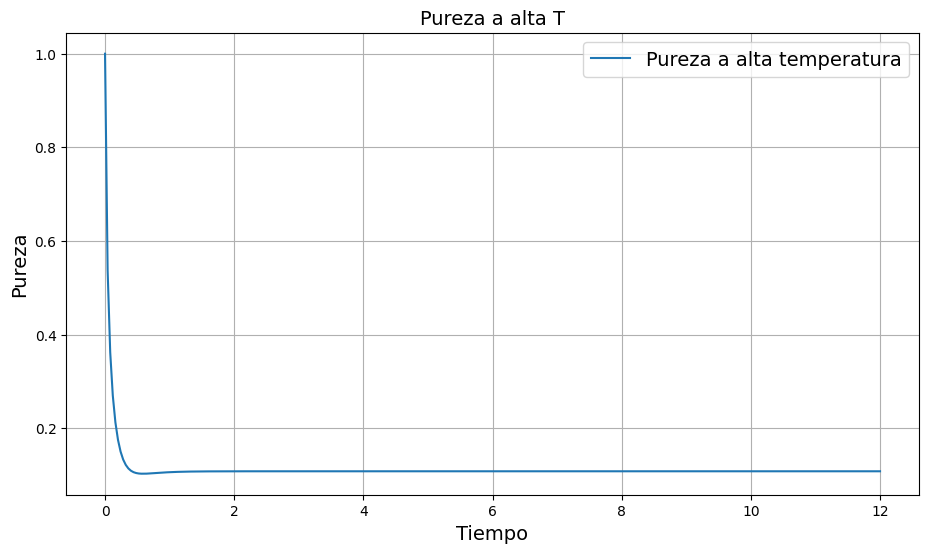

In [ ]:
# @title Evolución temporal de la pureza (T=100):

rho_sq = [state * state for state in rho_wig]

tr_rho_sq = [matrix.tr() for matrix in rho_sq]


fig, ax1 = plt.subplots(figsize=(11,6))

ax1.plot(t, tr_rho_sq,label="Pureza a alta temperatura")
ax1.set_title("Pureza a alta T", fontsize=14)
ax1.grid()
ax1.set_xlabel('Tiempo',fontsize=14)
ax1.set_ylabel('Pureza',fontsize=14)
ax1.legend(fontsize=14);


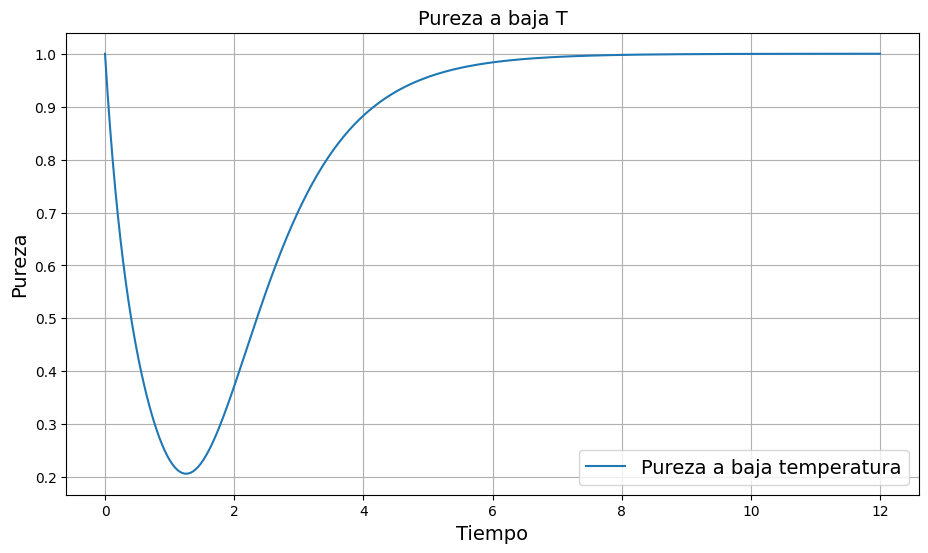

In [ ]:
# @title Pureza con temperatura baja (T=0.1)
N=10
T=0.1
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_creation= gamma*(n_w+1)/2

gamma_destruction=gamma*(n_w)/2

a= destroy(N)
a_dag= a.dag()

C_a = np.sqrt(gamma_destruction) * a
C_a_dag = np.sqrt(gamma_creation) * a_dag

N_op = num(N)

ketalpha = coherent(N, 1)
H=omega*a*a_dag
t = np.linspace(0, 12, 300)

result = mesolve(H, ketalpha, t, [C_a, C_a_dag], [position(N), momentum(N),num(N),a**2,a_dag**2,a*a_dag,a_dag*a])

res = mesolve(H, ketalpha, t, [C_a, C_a_dag], [])

rho_sq = [state * state for state in res.states]

tr_rho_sq = [matrix.tr() for matrix in rho_sq]


fig, ax1 = plt.subplots(figsize=(11,6))

ax1.plot(t, tr_rho_sq,label="Pureza a baja temperatura")
ax1.set_title("Pureza a baja T", fontsize=14)
ax1.grid()
ax1.set_xlabel('Tiempo',fontsize=14)
ax1.set_ylabel('Pureza',fontsize=14)
ax1.legend(fontsize=14);

# Se obtiene un resultado para $P$ muy similar :

Esto es de esperar, ya que las altas temperaturas acentúan el efecto de la disipación.  La diferencia es que la pureza no tiende a $1/2$ ya que los grados de libertad de mi sistema son más que en el caso de un sistema de dos niveles, en este caso tenemos 10 osciladores armónicos. Además, se ve en el caso de bajas temperaturas que como la pureza está limitada por debajo por $1/Dim(H)$ . En este estado transitorio para baja temperatura, tenemos una decoherencia momentánea mayor que en el sistema de dos niveles.

# 6) D) Grafique la entropía de Von Neumann:

Recordamos la definición usada en el ejercicio 4:

$$S_{VN} = - Tr(\rho log(\rho))$$

Podemos diagonalizar rho y sumar cada componente para obtener la entropía de Von Neumann como:

$$S_{VN} = - \sum n_jlog(n_j)$$

Donde $n_j$ son las componentes de la matriz diagonalizada


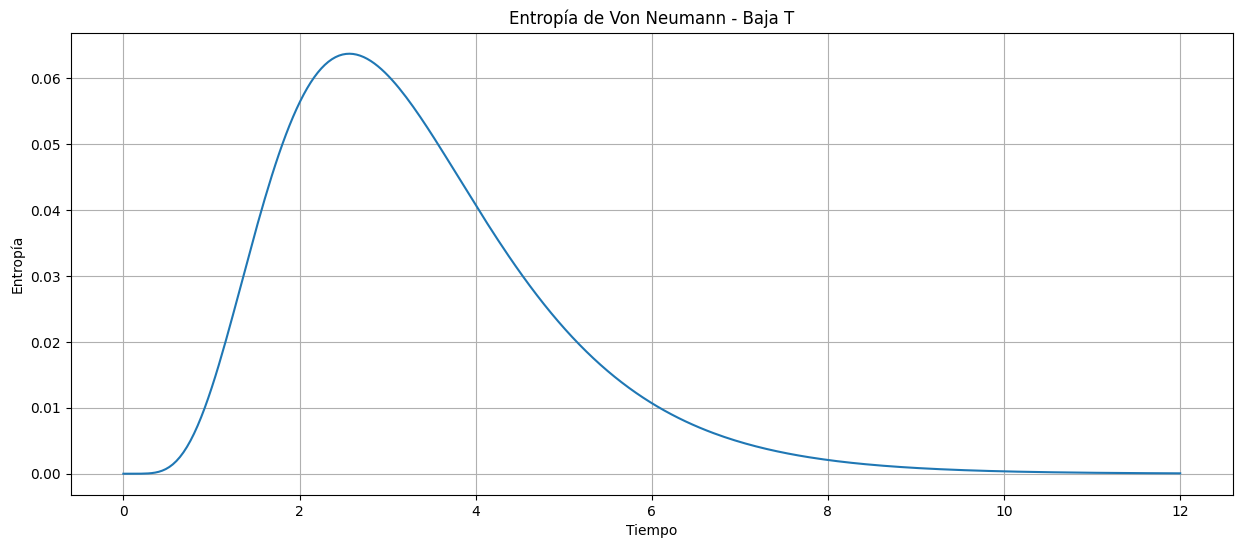

In [ ]:
# @title Entropía a baja Temperatura:
eigenvalues = [state.eigenenergies() for state in res.states]

S = [-(eigen[0]*np.log(eigen[0].clip(1e-15)) + eigen[1]*np.log(eigen[1].clip(1e-15)) ) for eigen in eigenvalues]

fig1, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(t,S)
ax1.set_title('Entropía de Von Neumann - Baja T')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Entropía')
ax1.grid()

plt.show();

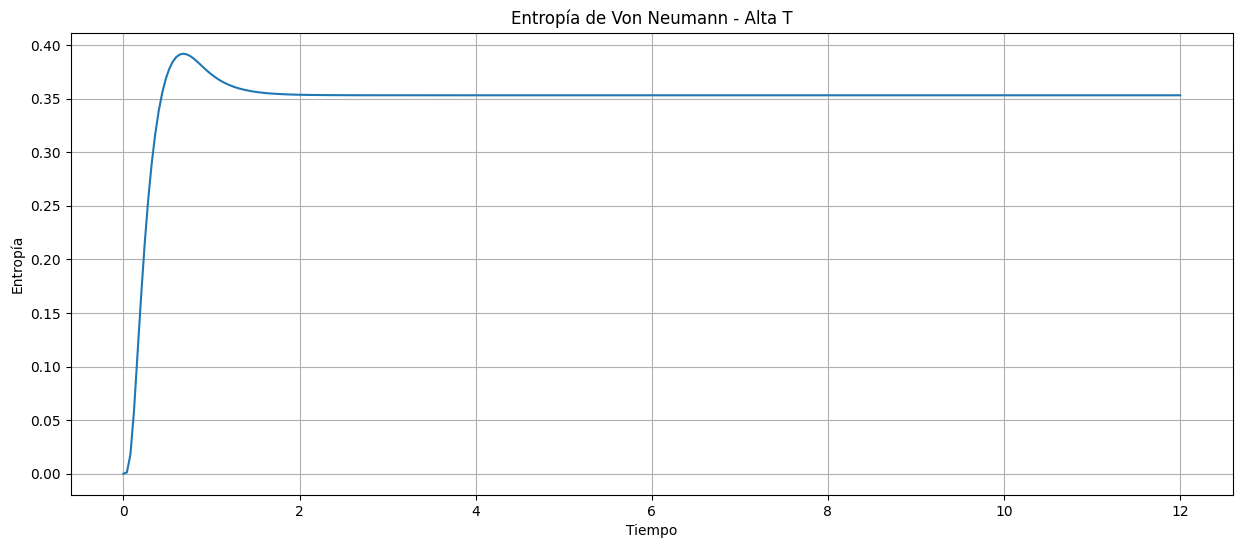

In [ ]:
# @title Entropía de Von Neuman a alta T
N=10
T=100
omega=10
gamma=0.2*omega
kb=1

n_w=1/(np.exp(omega/(kb*T))-1)

gamma_creation= gamma*(n_w+1)/2

gamma_destruction=gamma*(n_w)/2

a= destroy(N)
a_dag= a.dag()

C_a = np.sqrt(gamma_destruction) * a
C_a_dag = np.sqrt(gamma_creation) * a_dag

N_op = num(N)

ketalpha = coherent(N, 1)
H=omega*a*a_dag
t = np.linspace(0, 12, 300)

result = mesolve(H, ketalpha, t, [C_a, C_a_dag], [position(N), momentum(N),num(N),a**2,a_dag**2,a*a_dag,a_dag*a])

res = mesolve(H, ketalpha, t, [C_a, C_a_dag], [])

eigenvalues = [state.eigenenergies() for state in res.states]

S = [-(eigen[0]*np.log(eigen[0].clip(1e-15)) + eigen[1]*np.log(eigen[1].clip(1e-15)) ) for eigen in eigenvalues]

fig1, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(t,S)
ax1.set_title('Entropía de Von Neumann - Alta T')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Entropía')
ax1.grid()

plt.show();

# Entropía:
Cuando la entropía se anula, es relevante recordar que para los estados puros, la matriz densidad es idempotente $\rho = \rho²$ , por lo cual:

$$S=-Tr(\rho² log(\rho²))$$

Y esto equivale a entropía nula. Si bien se tiene un caso análogo para el caso de bajas temperaturas en el sentido de que el sistema decohere momentáneamente y vuelve a ser puro, no se ve exactamente lo mismo para altas temperaturas. Antes de llegar a un valor constante, se ve un "pico" que corresponde al estado de máxima entropía.